# **MODELES DE RECONNAISSANCE DES CHIFFRES MANUSCRITS**

## **A. Utilisation du dataset MNIST de la Librairie SCIKIT_LEARN**

##### **Importation des bibliothèques**

In [35]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
import random  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##### **Chargement de données et affichage de 5 prémières lignes**

In [36]:
All_data = load_digits()
print(All_data.data.shape) # Affichage de la taille du dataset et le nombre de dimensions d'une image
data_part = pd.DataFrame(All_data['data'][0:1700])
data_part.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


##### **Vérification des attributs ou variables de données**

In [37]:
	All_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

##### **Subdivision du dataset en Train et Test**

In [99]:
from sklearn.model_selection import train_test_split
train_x = All_data.data #représentation en GrayScale des chiffres
train_y = All_data.target #étiquettes correspondantes
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20) # Train 80% et Test 20%
print("Données Train : ", x_train.shape)
print("Labels Train : ", y_train.shape)
print("Données Test :", x_test.shape)
print("Labels Test : ", y_test.shape)

Données Train :  (1437, 64)
Labels Train :  (1437,)
Données Test : (360, 64)
Labels Test :  (360,)


##### **Fréquences de différentes classes**

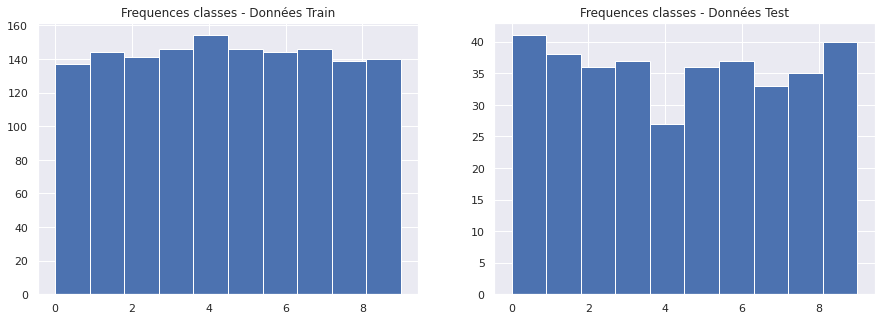

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequences classes - Données Train');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequences classes - Données Test');

##### **Visualisation des images du dataset**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


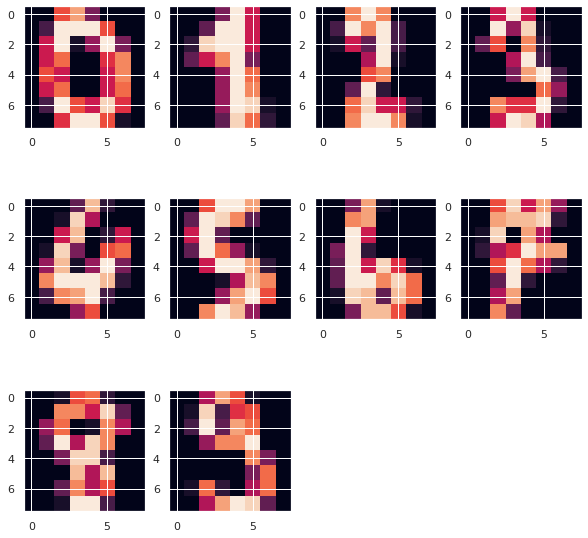

In [39]:
plt.figure(figsize=(10,10))
for i in y_train:
    plt.subplot(3,4, i+1)
    image = np.array(x_train[y_train==i][1:2] ).reshape(8,8)
    plt.imshow(image)

#### **Définition des fonctions pour le calcul de la matrice de confusion et l'affichage de l'image lors de la prédiction**

In [81]:
def Matrice_Confusion(y_test, Test_predict):
    plt.figure(figsize=(10,7))
    conf_mat = confusion_matrix(y_test, Test_predict) #Calcul de la matrice de confusion
    ax = sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.ylabel('Label réel')
    plt.xlabel('Label prédit')
    precision_modele = accuracy_score(y_test, Test_predict) #Calcul de la précision du modèle
    print()
    print(f"La précision du modèle est de : {precision_modele}")
    print()
    print("LA MATRICE DE CONFUSION")
    print("***********************")

def AfficageImage(i):
    plt.imshow(All_data['images'][i])
    plt.show()

# **1. Modèle naive bayesien**

##### **1.1 Définition du modèle, entrainement et détermination de la précision du modèle**


La précision du modèle est de : 0.7916666666666666

LA MATRICE DE CONFUSION
***********************


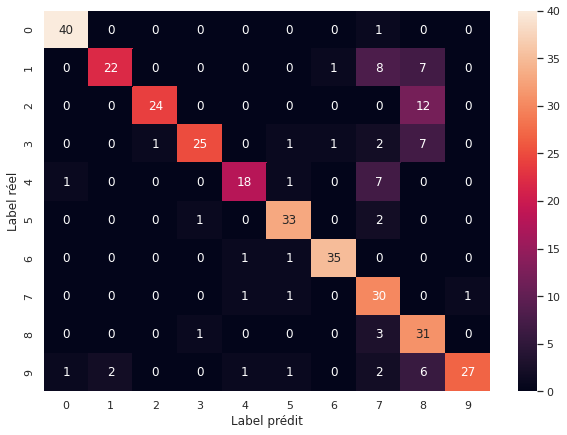

In [41]:
from sklearn.naive_bayes import GaussianNB
Modele_NBay = GaussianNB() #Définition du modèle
Modele_NBay.fit(x_train, y_train) # Entrainement du modèle
Test_predict = Modele_NBay.predict(x_test) #Prédiction
Matrice_Confusion(y_test, Test_predict)

##### **1.2 Présentation d'une image et prédiction du chiffre correspondant partant du modèle dévéloppé**

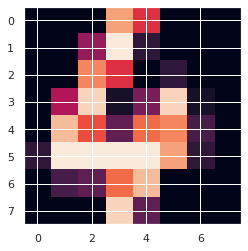

Correspondance prédiction :


array([4])

In [42]:
test = np.array(All_data['data'][800])
test1 = test.reshape(1,-1)
AfficageImage(800)
print("Correspondance prédiction :")
Modele_NBay.predict(test1)

# **2. Modèle de K-plus proches voisins (KK-NN)**

##### **2.1 Définition du modèle, entrainement et détermination de la précision du modèle**


La précision du modèle est de : 0.9888888888888889

LA MATRICE DE CONFUSION
***********************


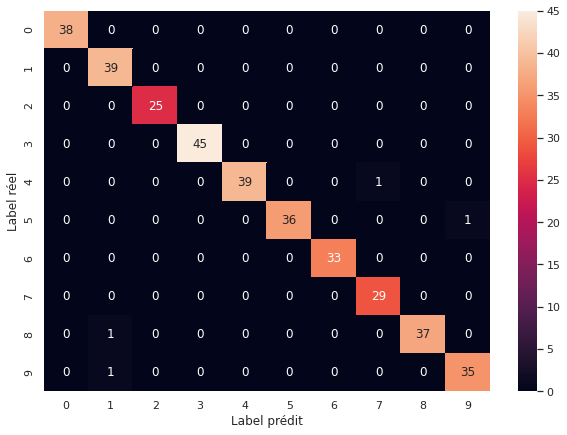

In [101]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(5) # on veut entrainer un 5-NN Classifier (on utilise 5 voisins)
KNN.fit(x_train, y_train)
Test_predict = KNN.predict(x_test)
Matrice_Confusion(y_test, Test_predict)

##### **2.2 Présentation d'une image et prédiction du chiffre correspondant partant du modèle dévéloppé**

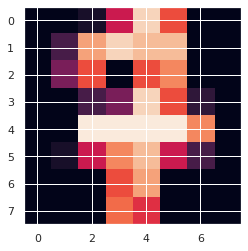

Correspondance prédiction :


array([7])

In [44]:
test = np.array(All_data['data'][17])
test1 = test.reshape(1,-1)
AfficageImage(17)
print("Correspondance prédiction :")
KNN.predict(test1)

# **3. Modèle de forêt aléatoire (Random Forest)**

##### **3.1 Définition du modèle, entrainement et détermination de la précision du modèle**


La précision du modèle est de : 0.9638888888888889

LA MATRICE DE CONFUSION
***********************


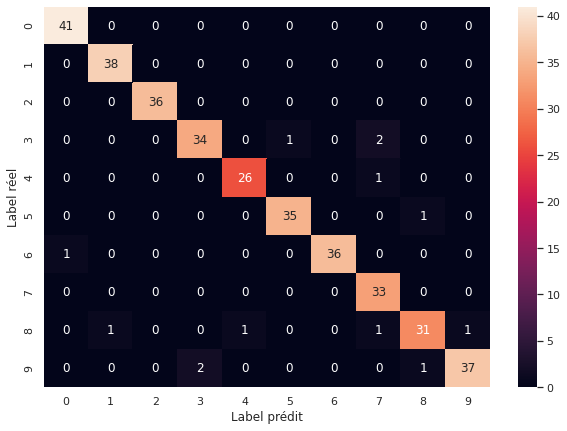

In [45]:
from sklearn.ensemble import RandomForestClassifier
ModeleRF = RandomForestClassifier()
ModeleRF.fit(x_train, y_train)
Test_predict = ModeleRF.predict(x_test)
Matrice_Confusion(y_test, Test_predict)

##### **3.2 Présentation d'une image et prédiction du chiffre correspondant partant du modèle dévéloppé**

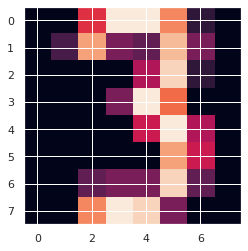

Correspondance prédiction :


array([3])

In [46]:
test = np.array(All_data['data'][1300])
test1 = test.reshape(1,-1)
AfficageImage(1300)
print("Correspondance prédiction :")
ModeleRF.predict(test1)

# **4. Modèle de support vecteur machine (SVM)**

##### **4.1 Définition du modèle, entrainement et détermination de la précision du modèle**

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



La précision du modèle est de : 0.9388888888888889

LA MATRICE DE CONFUSION
***********************


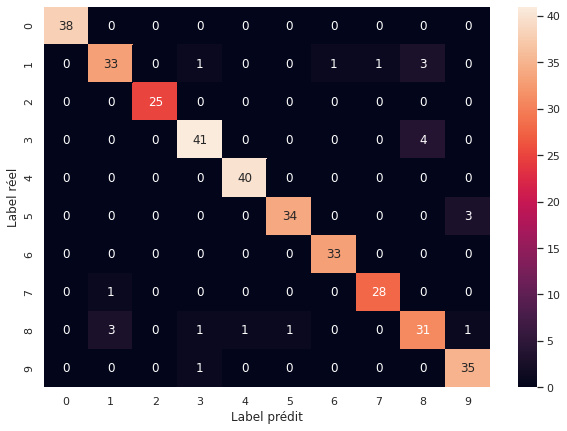

In [105]:
from sklearn.svm import LinearSVC
ModeleSVM = LinearSVC()
ModeleSVM.fit(x_train, y_train)
Test_predict = ModeleSVM.predict(x_test)
Matrice_Confusion(y_test, Test_predict)

##### **4.2 Présentation d'une image et prédiction du chiffre correspondant partant du modèle dévéloppé**

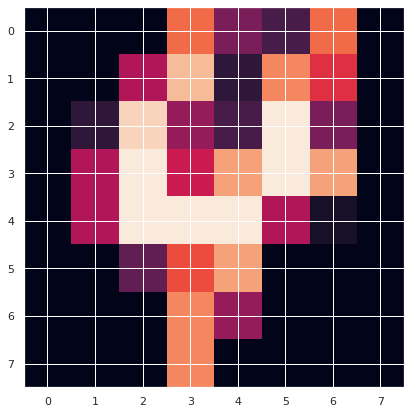

Correspondance prédiction :


array([4])

In [83]:
test = np.array(All_data['data'][770])
test1 = test.reshape(1,-1)
AfficageImage(770)
print("Correspondance prédiction :")
ModeleSVM.predict(test1)

# **5. Modèle de Regression Logistique (LogisticRegression)**

##### **5.1 Définition du modèle, entrainement et détermination de la précision du modèle**


La précision du modèle est de : 0.9638888888888889

LA MATRICE DE CONFUSION
***********************


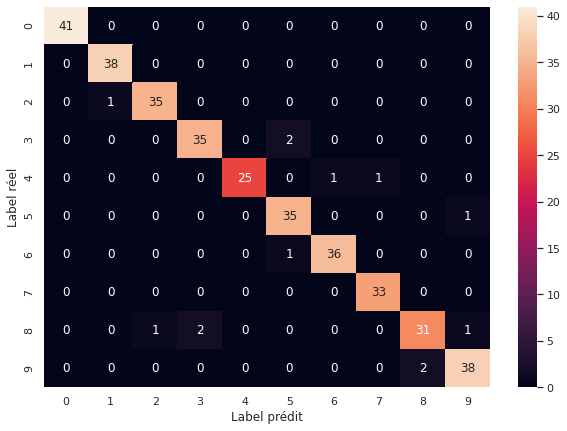

In [84]:
from sklearn.linear_model import LogisticRegression
Modele_RegL = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l2', solver='saga',max_iter=10000,C=50)
Modele_RegL.fit(x_train, y_train)
Test_predict = Modele_RegL.predict(x_test)
Matrice_Confusion(y_test, Test_predict)

##### **5.2 Présentation d'une image et prédiction du chiffre correspondant partant du modèle dévéloppé**

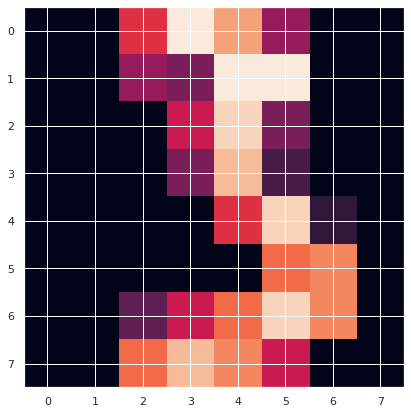

Correspondance prédiction :


array([3])

In [85]:
test = np.array(All_data['data'][45])
test1 = test.reshape(1,-1)
AfficageImage(45)
print("Correspondance prédiction :")
Modele_RegL.predict(test1)